In [24]:
import pandas as pd
import numpy as np


In [25]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

# print("Path to dataset files:", path)

In [26]:
# houses = pd.read_csv(path +'/housing_prices_dataset.csv')
# houses.head()

In [27]:
houess = pd.read_csv('Housing.csv')

In [28]:
houess.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [29]:
houess.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
96,6300000,9000,3,1,1,yes,no,yes,no,no,1,yes,furnished
306,4165000,4840,3,1,2,yes,no,no,no,no,1,no,semi-furnished
279,4270000,6360,2,1,1,yes,no,no,no,no,0,no,furnished
425,3360000,3185,2,1,1,yes,no,yes,no,no,2,no,furnished


In [30]:
houess.shape

(545, 13)

In [31]:
houess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [32]:
houess.describe()
houess.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [33]:
houess=houess[['area', 'price', 'bedrooms', 'bathrooms', 'parking', 'airconditioning']]
houess.head()

,area,price,bedrooms,bathrooms,parking,airconditioning
0,7420,13300000,4,2,2,yes
1,8960,12250000,4,4,3,yes
2,9960,12250000,3,2,2,no
3,7500,12215000,4,2,3,yes
4,7420,11410000,4,1,2,yes


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
houess.isnull().sum()


area               0
price              0
bedrooms           0
bathrooms          0
parking            0
airconditioning    0
dtype: int64

In [36]:
print(houess.dtypes)


area                int64
price               int64
bedrooms            int64
bathrooms           int64
parking             int64
airconditioning    object
dtype: object


In [37]:
houess['airconditioning'] = houess['airconditioning'].map({'yes': 1, 'no': 0})

In [38]:
# in this case we will use preprssing 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
houess['airconditioning'] = le.fit_transform(houess['airconditioning'])
houess['airconditioning'].unique()

array([1, 0])

In [39]:
houess.head()

,area,price,bedrooms,bathrooms,parking,airconditioning
0,7420,13300000,4,2,2,1
1,8960,12250000,4,4,3,1
2,9960,12250000,3,2,2,0
3,7500,12215000,4,2,3,1
4,7420,11410000,4,1,2,1


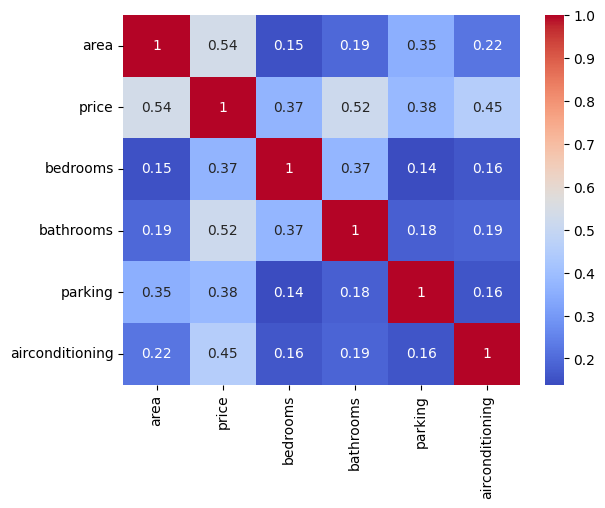

In [40]:
import seaborn as sns
sns.heatmap(houess.corr(), annot=True, cmap='coolwarm')
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
houess[['area', 'price', 'bedrooms', 'bathrooms', 'parking']] = scaler.fit_transform(houess[['area', 'price', 'bedrooms', 'bathrooms', 'parking']])
houess.head()

,area,price,bedrooms,bathrooms,parking,airconditioning
0,1.046726,4.566365,1.403419,1.421812,1.517692,1
1,1.757010,4.004484,1.403419,5.405809,2.679409,1
2,2.218232,4.004484,0.047278,1.421812,1.517692,0
3,1.083624,3.985755,1.403419,1.421812,2.679409,1
4,1.046726,3.554979,1.403419,-0.570187,1.517692,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = houess[['area', 'bedrooms', 'bathrooms', 'parking', 'airconditioning']]
y = houess['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

li=LinearRegression()

model = li.fit(X_train, y_train)
y_pred = li.predict(X_test)



In [43]:
y_pred

array([ 0.5811887 ,  0.95431574, -0.77783088,  0.06987477, -0.64898882,
       -0.24030726,  0.87088485,  0.30654573, -0.75639279, -0.83556083,
        2.34511999, -0.79352662, -0.26034661, -0.77633162, -0.64750809,
        0.62680994, -1.07989985,  0.35784431, -0.22923429, -0.48760774,
        0.07283623,  0.34010805, -0.83572743, -0.53278399,  0.405934  ,
        1.1815738 , -0.91850025, -0.1288075 ,  1.56386662, -0.93182683,
        0.58413317, -0.63347365,  0.88027923, -0.25585493, -0.3876214 ,
        0.8128735 , -0.2676177 , -0.05893024, -0.15519623, -0.01965915,
        0.22605777, -0.27367318,  0.9424699 , -0.47355478, -0.37655297,
        0.20012801,  0.88027923, -0.26771475, -0.18405804, -0.6520338 ,
        1.37847996, -0.79193031, -0.08562197, -0.00416174, -0.55568428,
       -0.8044655 ,  0.98315748, -0.87998274, -0.13959908, -0.8133684 ,
        0.03695077, -0.25689066,  0.56210156, -0.07673605, -0.16189356,
       -0.3988104 ,  0.2635675 , -0.79113892,  0.56883286,  0.45

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R2: {r2}")


MSE: 0.6542316269177939, R2: 0.5480014097583653


In [45]:
%pip install pickle 
%pip install streamlit


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


Note: you may need to restart the kernel to use updated packages.


In [46]:
import pickle

# Save the model to disk
filename = 'housing_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

# Load the model from disk